In [1]:
from sklearn import cluster, datasets



import numpy as np 
import math
import sklearn 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from sklearn import svm


# we create 40 separable points
X,y = datasets.make_circles(100, factor=0.1, noise=0.05,random_state=23)
X1, y1  = datasets.make_circles(n_samples=100, factor=.5,
                                      noise=.05, random_state=23)

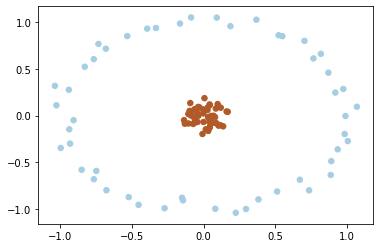

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [3]:
for i in range(0,len(X)):
    if y[i] == 1:
        y[i] = 0

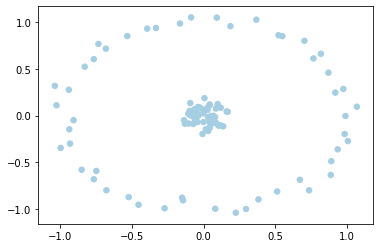

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

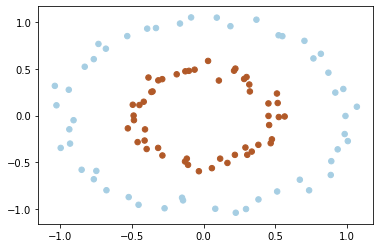

In [5]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=30, cmap=plt.cm.Paired)
plt.show()

In [6]:
X = np.concatenate((X1,X),axis=0)
y = np.concatenate((y1,y),axis=0)

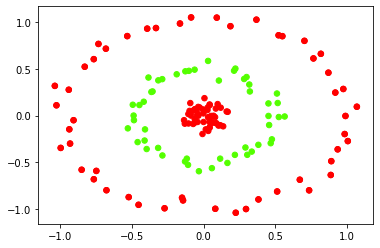

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='prism')
plt.show()

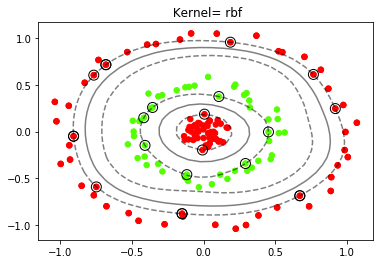

In [9]:
for k in ['rbf']:
    # fit the model, don't regularize for illustration purposes
    clf = svm.SVC(kernel=k,C=1000)
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='prism')

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    ax.set_title(" Kernel= "+str(k))
    plt.show()

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


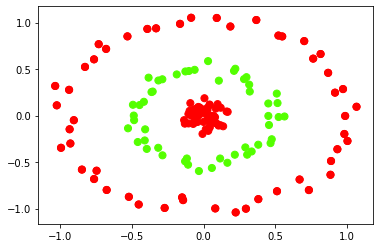

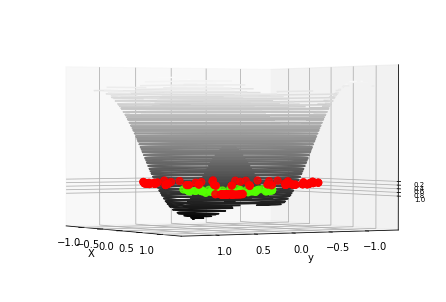

In [10]:
for k in ['rbf']:
    clf = svm.SVC(kernel=k, C=1000)
    clf.fit(X, y)
    plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='prism')

    r = np.exp(-(X**2).sum(1))
   
    zaxis = [0.2,0.4,0.6,0.8, 1.0]
    zaxislabel = [r'0.2',r'0.4', r'0.6', r'0.8', r'1.0']
    
    fig = plt.figure()
    ax = Axes3D(fig)


    def plot3dim():

        ax.scatter(X[:,0], X[:,1], r, c=y, s=50, cmap='prism')

        # create grid to evaluate model
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour3D(XX, YY, Z, 50, cmap='binary')

        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.set_zlabel('', fontsize=15, labelpad=-1, color='lime')
        ax.set_zticklabels(zaxislabel, fontsize=7)
        ax.set_zticks(zaxis)
        ax.grid('False')
        return fig, 

    def animate(k):
        ax.view_init(elev=k,azim=30)
        #return fig, 

    ani = animation.FuncAnimation(fig, animate, init_func=plot3dim, frames=360, interval=30, blit=False)

    #ani.save('SVManim.mpeg', fps=30, dpi=200, extra_args=['-vcodec', 'libx264'])
    ani.save(str(k)+'_kernel_multinon_linear.gif', writer='PillowWriter', fps=10)
    #plot3dim(elev=10, azim=-20, X=X,  y=y)

    plt.show()